# Linear Regression


In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [7]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

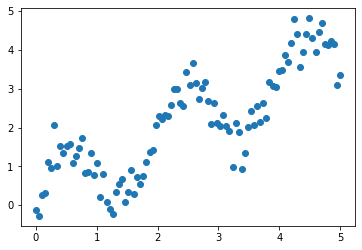

In [8]:
plt.scatter(x,y)

#### nonlinear

In [9]:
regr_lin = LinearRegression()

In [10]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [11]:
regr_lin.fit(X,y)

LinearRegression()

0.5873765503738464


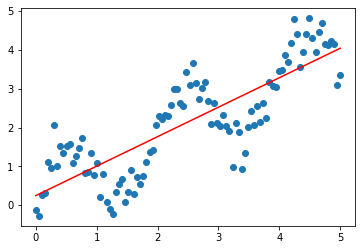

In [12]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [13]:
print(x.shape)

(100,)


In [17]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [18]:
regr_poly = LinearRegression()

In [19]:
regr_poly.fit(X_poly, y)

LinearRegression()

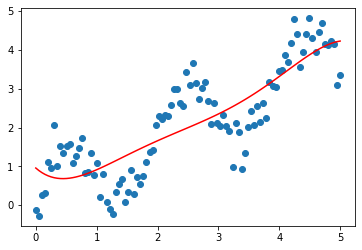

In [20]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [23]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.3849568   2.12704551 -0.97364268  0.20278596 -0.01536552]
interception:  0.9571133062523991


In [28]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b #.T: 矩陣轉置

array([0.95711331, 0.89246746, 0.83793851, 0.79282063, 0.75643841,
       0.72814632, 0.70732805, 0.69339595, 0.68579038, 0.68397913,
       0.68745681, 0.69574425, 0.70838786, 0.72495909, 0.74505375,
       0.76829146, 0.79431502, 0.82278979, 0.85340313, 0.88586374,
       0.91990109, 0.9552648 , 0.99172405, 1.02906694, 1.06709993,
       1.10564719, 1.14455003, 1.18366626, 1.22286961, 1.26204913,
       1.30110855, 1.33996571, 1.37855192, 1.4168114 , 1.45470062,
       1.49218773, 1.52925196, 1.56588297, 1.6020803 , 1.63785273,
       1.67321767, 1.70820058, 1.74283433, 1.77715864, 1.81121943,
       1.84506824, 1.8787616 , 1.91236047, 1.94592957, 1.97953683,
       2.01325276, 2.04714985, 2.08130194, 2.11578366, 2.15066978,
       2.18603463, 2.22195149, 2.25849198, 2.29572545, 2.33371838,
       2.37253379, 2.41223058, 2.45286301, 2.49448   , 2.5371246 ,
       2.58083335, 2.62563566, 2.67155324, 2.71859946, 2.76677879,
       2.81608613, 2.86650625, 2.91801319, 2.97056961, 3.02412

In [31]:
Y2=regr_poly.predict(X_poly)

mse = np.sum((Y2-y)**2) / len(y)
print(mse)

0.5540531098350915


#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [32]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [33]:
sigma = 0.3

In [35]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [36]:
regr_rbf = LinearRegression()

In [37]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

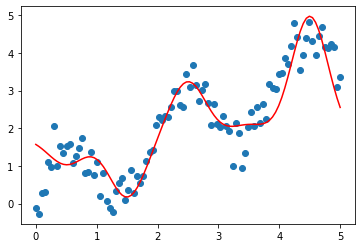

In [39]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [40]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-0.71204381 -1.57833934  1.49357097  0.33647445  3.2250127 ]
interception:  1.746989134184334


#### Comparison

In [41]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

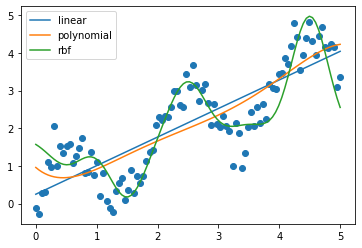

In [42]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [43]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5873765503738464


In [44]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5540531098350915


In [45]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.3145057405963833
